# Pandas Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Hi everyone, welcome to today's tutorial, where we will be looking at visualization in pandas. Pandas uses matplotlib under the hood, and provides some convenient functions for visualizing data. Before we dive into visualization in pandas, lets take a look at the matplotlib's style package. Matplotlib comes with a number of predefined styles, which we can choose from, to change the default look of our plots. Because pandas is using matplotlib under the hood, this will change the default style of our pandas graphs as well. We can use plt.style.available to see the predefined styles provided.

In [2]:
# see the pre-defined styles provided.
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Let's use the seaborn-colorblind style, which will change the default colors of our plots to use a color palette that is more color vision deficiency friendly.

In [3]:
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

### DataFrame.plot

Now, where the built-in visualization of pandas really shines is in helping with fast and easy plotting of series and DataFrames that can help us explore the data. Let's make a DataFrame. First, we'll set the seed for the random number generator, which will allow us to reproduce the data.

Next, let's add three columns of random time series data.

We can generate the random data by cumulatively summing up random numbers.

numpy has a great function for this called cumsum, which cumulatively sums an array

Let's do this for three columns, A, B and C. And also offset the B column by + 20 and the C column by- 20. Using date_range, we can set the index to be everyday in 2017.

In [4]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


Now let's see what this data looks like a little more visually to plot this data we can use the plot method on the DataFrame.

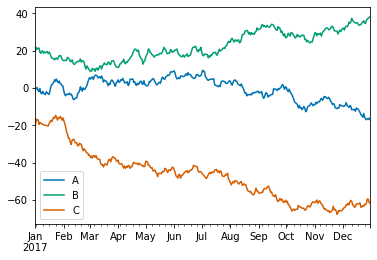

In [7]:
df.plot(); # add a semi-colon to the end of the plotting call to suppress unwanted output

The plot method on series and DataFrame is just a simple wrapper around plt.plot. So when we call df.plot, we get a line graph of all the columns in the data frame with labels.

Notice how the colors are slightly different from the default matplotlib colors because of the style we used.

Also, notice this cool Jupyter Notebook trick. If you add a semicolon to the end of the plotting call, this will suppress unwanted output. And this works with regular matplotlib, too.

DataFrame.plot allows us to plot a number of different kinds of plots. We can select which plot we want to use by pressing it into the kind parameter.

Let's try and create a scatter plot that takes the A and B columns of df.

We pass in scatter to the kind parameter to change the plot type.

This is what we'd get if we called plt.plot on the A and B columns with the point marker parameter.

Passing scatter into the kind keyword argument changed the plot to a scatterplot. You can also choose the plot kind by using the methods dataframe.plot.kind instead of providing the kind keyword argument.

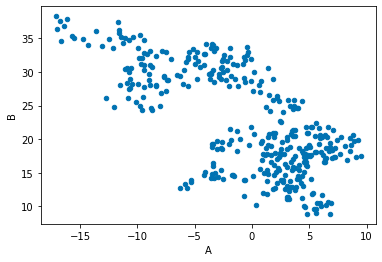

In [8]:
df.plot('A','B', kind = 'scatter');

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

Now let's try this and create something a little more complex. This time we want to make a scatterplot with points varying in color and size. We'll use df.plot.scatter, pass in columns A and C.

And set the color C and size S to change based on the value of column B.

Finally, we can choose the color palette used by passing a string into the parameter color map.

Here, I'll use viridis, which is particularly pleasing to the eye.

<AxesSubplot:xlabel='A', ylabel='C'>

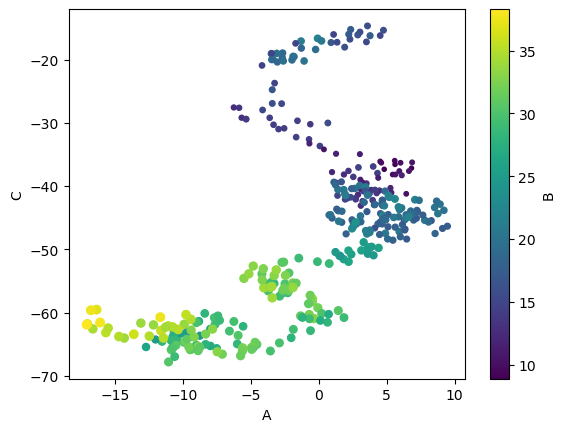

In [7]:
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')

Here we can see the A and C columns plotted against one another with the size and color changing based on the values of the B column. Because df.plot.scatter returns a matplotlib.axes._subplot, we can perform modification on this object just like objects returned by matplotlib plots.

For example, let's see what it looks like when we change the aspect ratio of the AxesSubplot to equal.

Setting the aspect ratio to equal allows the viewer to easily see that the range of series A is much smaller than series C.

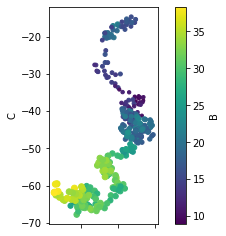

In [9]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

Using pandas, we can also easily do box plots, Histograms, And kernel density estimate plots. Which are useful for visualizing an estimate of a variable's probability density function. Kernel density estimation plots come in handy in data science application where you want to derive a smooth continuous function from a given sample.

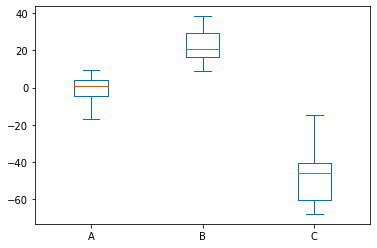

In [10]:
df.plot.box();

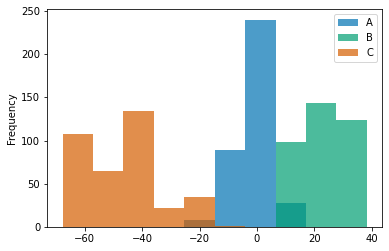

In [11]:
df.plot.hist(alpha=0.7);

[Kernel density estimation plots](https://en.wikipedia.org/wiki/Kernel_density_estimation) are useful for deriving a smooth continuous function from a given sample.

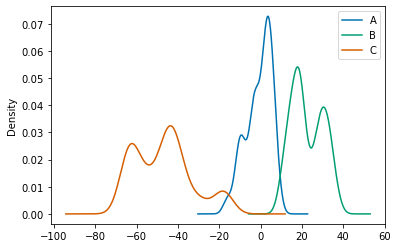

In [12]:
df.plot.kde();

### pandas.tools.plotting

Pandas also has plotting tools that help with visualizing large amounts of data or high dimensional data.

Let's explore a couple of these tools by loading in the iris flower data set.

The iris data set is a classic multivariate data set, which includes the sepal length, sepal width, petal length, and petal width for hundreds of samples of three species of the iris flower. pandas has a plotting tool that allows us to create a scatter matrix from a DataFrame.

[Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [13]:
iris = pd.read_csv('../assets/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


A scatter matrix is a way of comparing each column in a DataFrame to every other column in a pairwise fashion. Let's use it to visualize the iris dataframe and see what insights we can gain from our data.

The scatter matrix creates scatter plots between the different variables and histograms along the diagonals.

This allows us to quickly see some of the more obvious patterns in the data set.

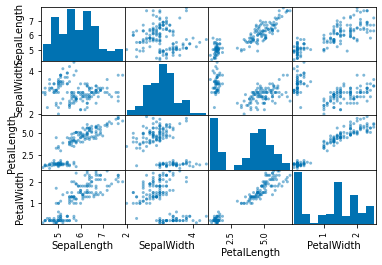

In [14]:
pd.plotting.scatter_matrix(iris);

Looking at the scatter plots, it appears that there are some distinct groupings of the points, which might indicate that there could be some clustering going on. And while this looks impressive and is certainly useful, realize that in the last two weeks you have gained all of the skills to manually build these kinds of plots if you want to. This is nothing more than a four by four grid of subplots, with some plots histograms and the others scatterplots.

Let's look at one more plotting tool in pandas which will help us visualize multivariate data. pandas includes a plotting tool for creating parallel coordinates plots.

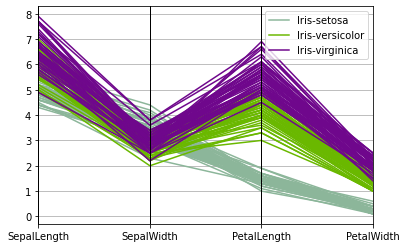

In [15]:
plt.figure()
pd.plotting.parallel_coordinates(iris, 'Name');

Parallel coordinate plots are a common way of visualizing high dimensional multivariate data.

Each variable in the data set corresponds to an equally spaced parallel vertical line. The values of each variable are then connected by lines between for each individual observation.

Coloring the lines by class, in this example the species of flower, allows the viewer to more easily see any patterns or clustering.

For instance, looking at our iris data set, we can see that the petal length and petal width are two variables that split the different species fairly clearly. With iris virginica having the longest and widest petals. And iris setosa having the shortest and narrowest petals. Well that's it for visualization in pandas.

In the next video, we'll look at Seaborn, a powerful package for statistical plotting.